# Project MVP

## Imports

In [1]:
import sys

sys.path.append('/Users/nickolaspedrimiranda/CodeUp/Regression-Project/')

In [52]:
# Import basic DS libraries
import pandas as pd
import numpy as np

# Import libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Import useful DS functions
import acquire as ac
import prepare as prep
import evaluate as ev


# For modeling
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsClassifier

# Acquire

CSV files were downloaded straight from the website. No other acquisition required. LINK: https://data.world/food/wine-quality

In [3]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')

In [4]:
# Create label for red wine
red['wine_type'] = 'red'

In [5]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
# Create label for white wine
white['wine_type'] = 'white'

In [7]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
# Join tables
wines = pd.concat([red,white])

In [9]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [10]:
# Re-index tables
wines = wines.reset_index().drop(columns='index')

In [11]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [12]:
# Save final product to .csv
wines.to_csv('wines.csv', index=False)

In [13]:
# Create function to acquire wines tables
def get_wine():
    return pd.read_csv('wines.csv')

# Prepare

In [14]:
seed = 100

In [15]:
wine = get_wine() # acquire data

In [16]:
wine, val, test = prep.train_val_test(wine, strat='quality', seed=seed)

In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5397,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5,white
5111,6.3,0.21,0.31,1.2,0.043,30.0,117.0,0.99158,3.49,0.68,11.0,6,white
3519,8.1,0.26,0.33,11.1,0.052,52.5,158.0,0.99760,3.03,0.49,10.2,7,white
6105,6.6,0.19,0.28,1.1,0.044,38.0,100.0,0.99040,3.22,0.69,11.2,6,white
2115,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.1,5,white


Data is already clean enough for mvp. No preparation needed for inital pass of project

# Explore

In [18]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000,4547.000000
mean,7.204948,0.340979,0.316815,5.473400,0.056262,30.433693,116.022652,0.994693,3.217675,0.530501,10.493276,5.823840
std,1.285119,0.165459,0.144355,4.796098,0.036155,17.776858,56.870340,0.003012,0.161511,0.147374,1.200601,0.879434
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996920,3.320000,0.600000,11.300000,6.000000
max,15.600000,1.330000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,1.950000,14.050000,9.000000


In [19]:
wine.quality.value_counts()

6    1952
5    1502
7     779
4     151
8     139
3      21
9       3
Name: quality, dtype: int64

Check distributions of the data first

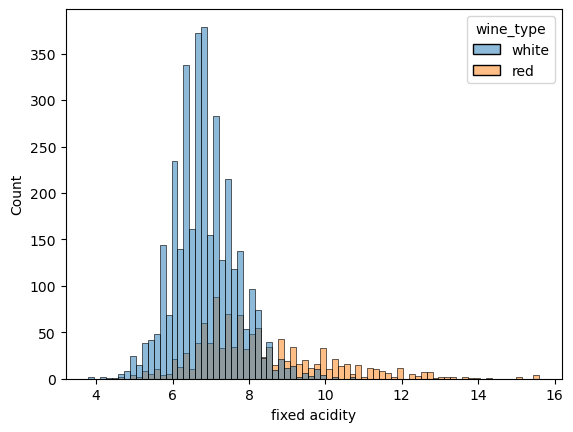

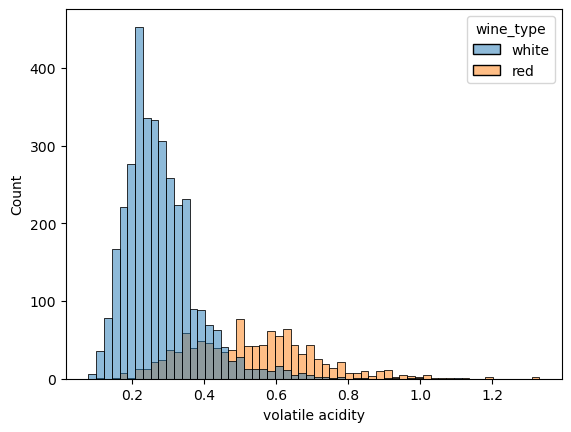

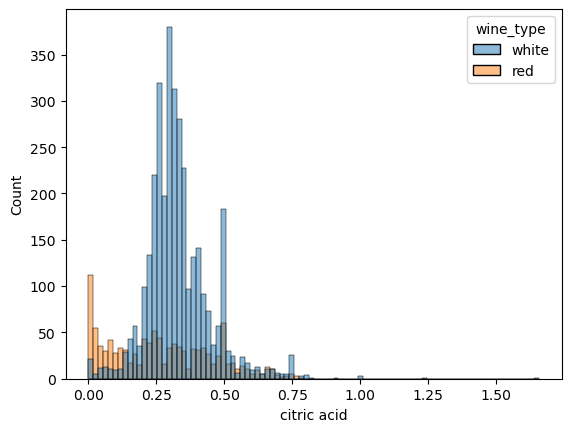

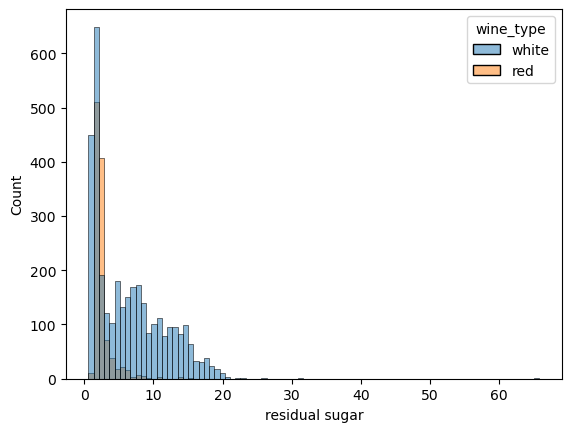

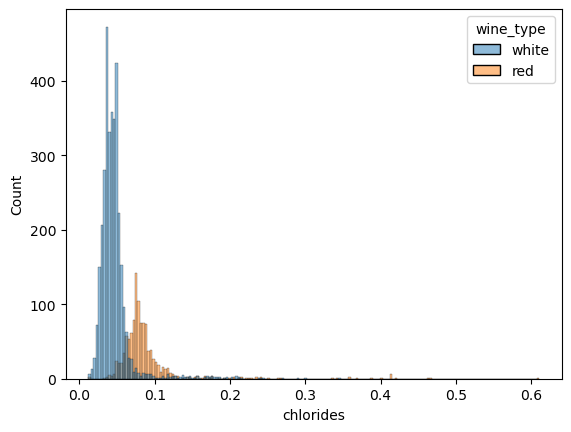

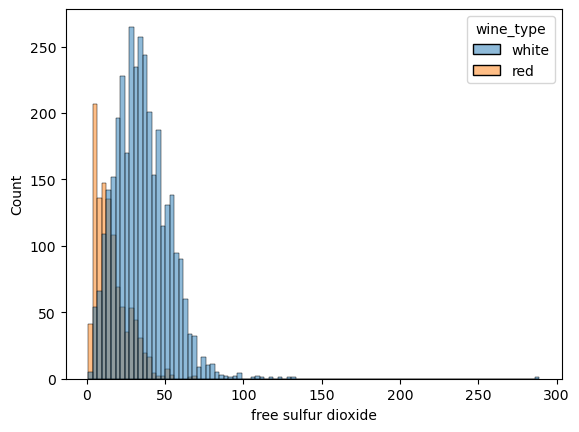

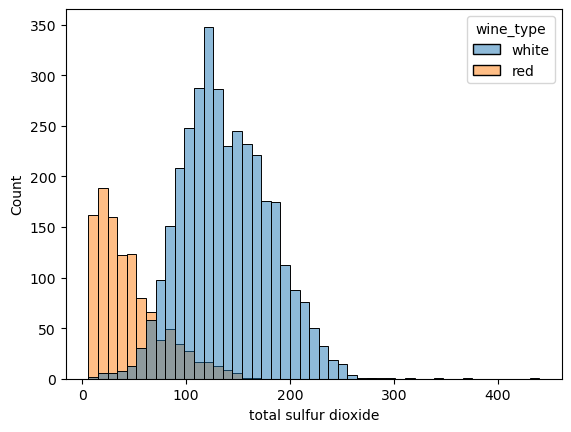

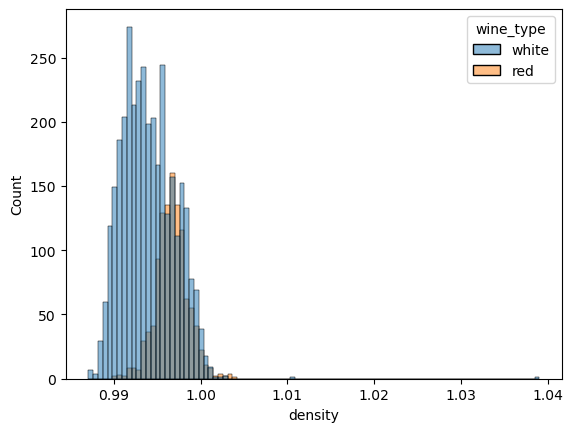

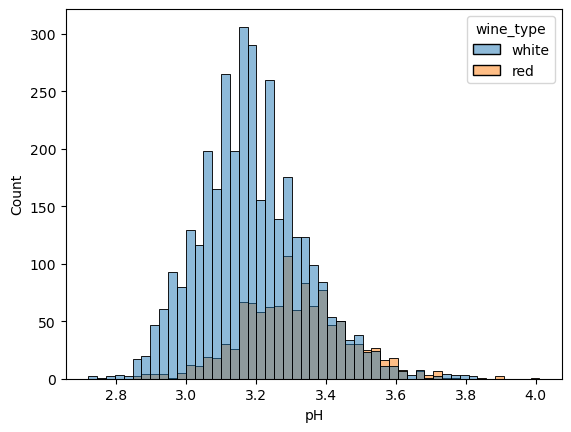

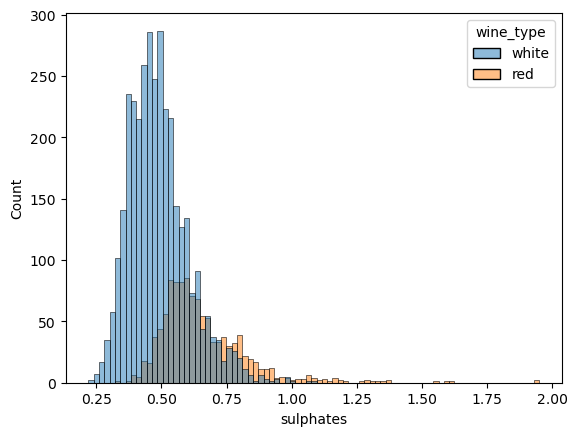

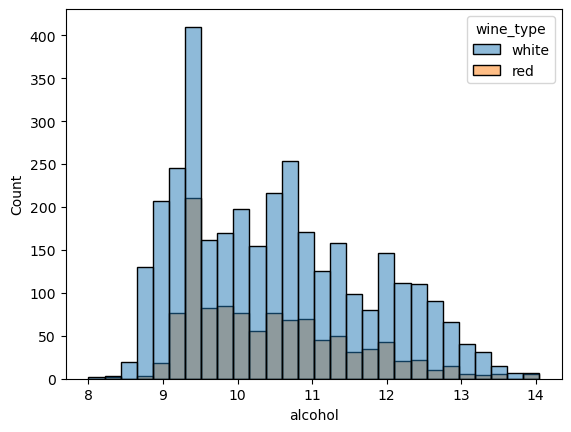

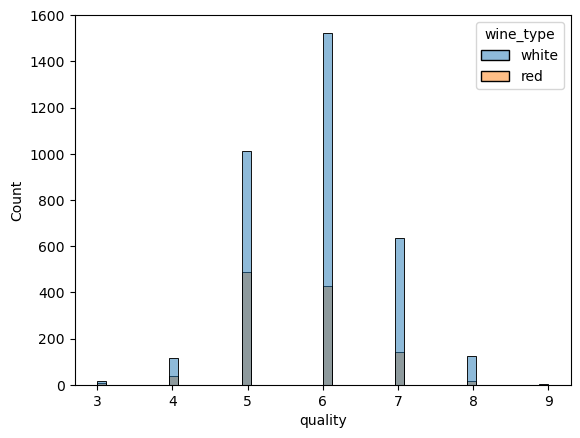

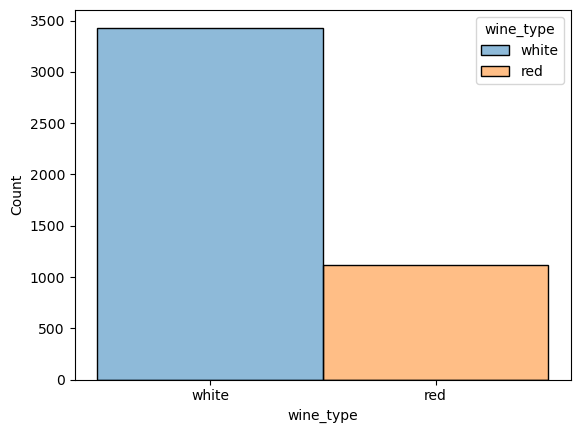

In [20]:
for col in wine.columns:
    plt.figure()
    sns.histplot(wine, x=col, hue='wine_type')
    plt.show()

Mostly normal distributions with a few outliers in each category. There are far more white wines than red.

I will bin data so it is easier to see when plotted

In [21]:
bin_wine = wine.copy()

In [22]:
for col in bin_wine.select_dtypes(float).columns:
    bin_wine[col] = pd.qcut(bin_wine[col], 10, [1,2,3,4,5,6,7,8,9,10])

In [23]:
bin_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5397,8,2,8,3,7,4,7,2,2,6,7,5,white
5111,2,2,5,1,4,6,5,2,10,9,7,6,white
3519,9,4,6,9,7,9,8,9,2,5,5,7,white
6105,4,2,4,1,4,7,4,1,6,9,8,6,white
2115,4,1,7,2,7,9,8,4,2,3,1,5,white


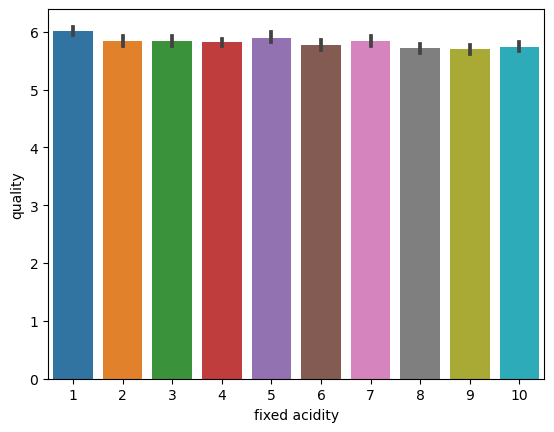

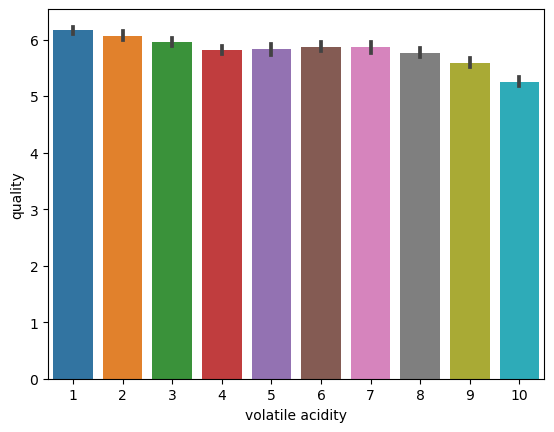

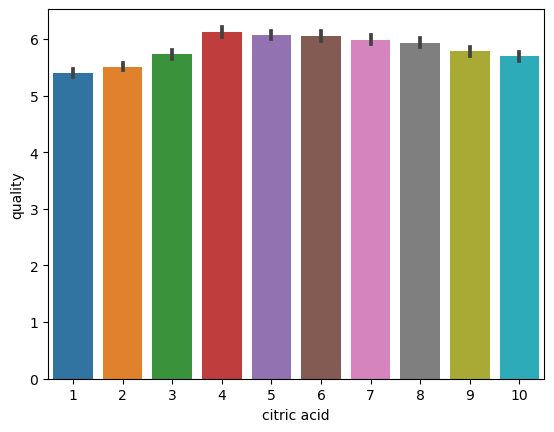

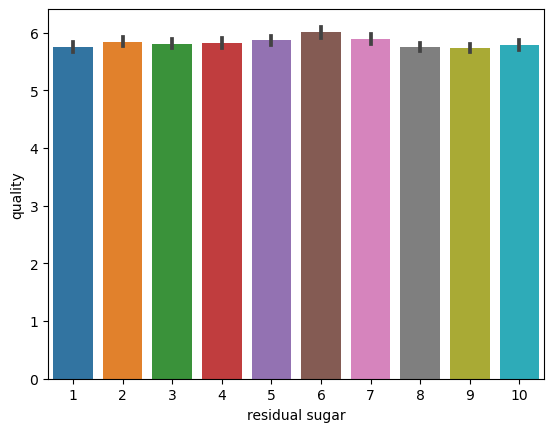

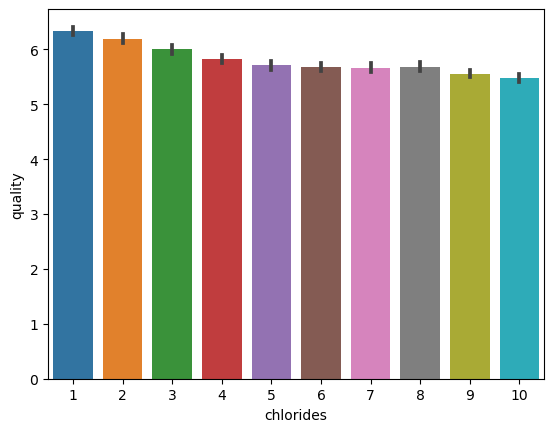

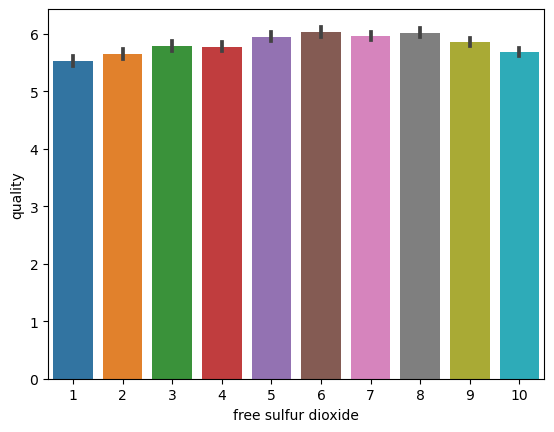

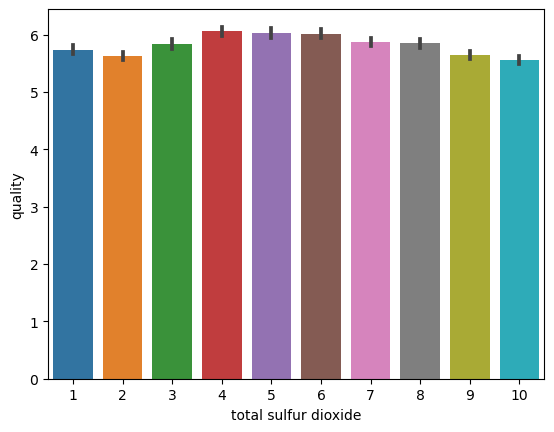

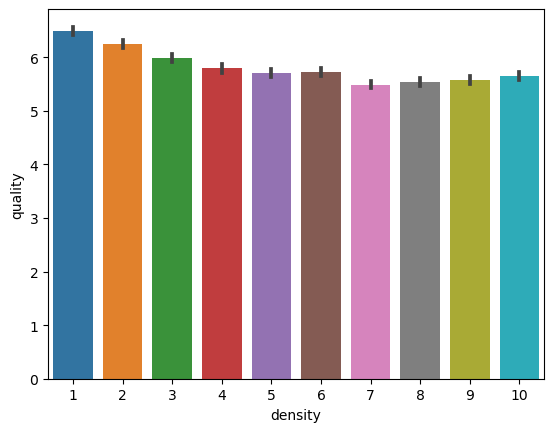

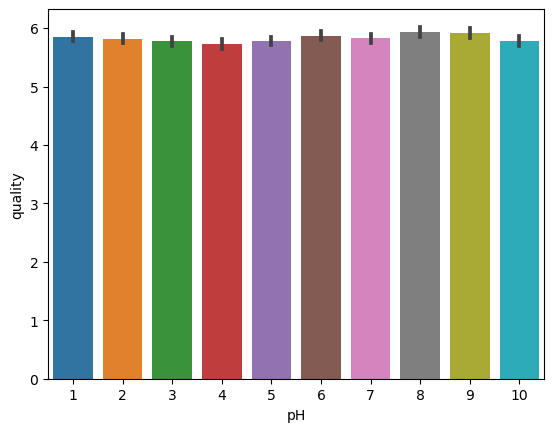

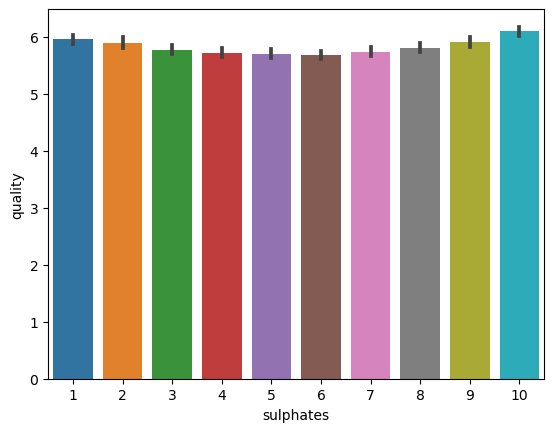

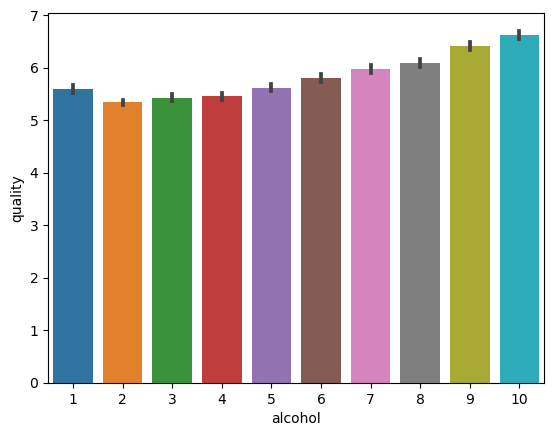

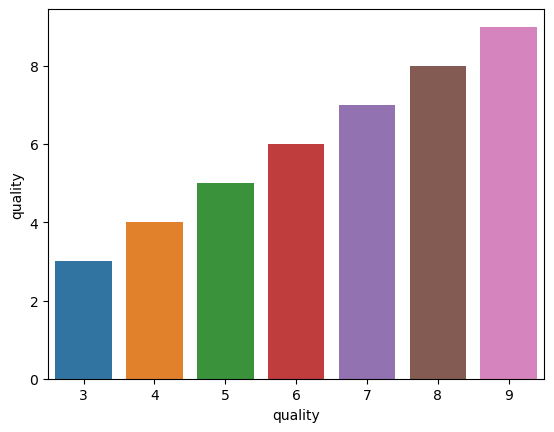

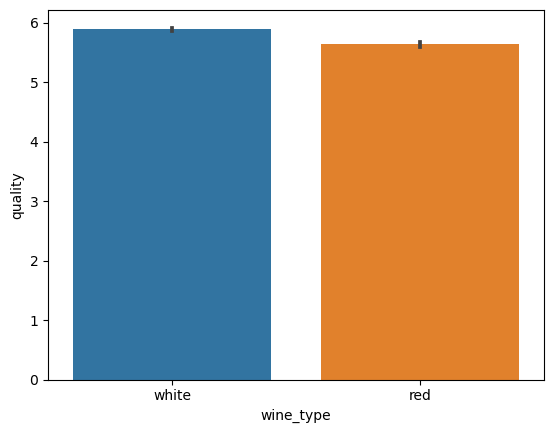

In [24]:
for col in bin_wine:
    plt.figure()
    sns.barplot(bin_wine, x=col, y='quality')

Initial conclusions: No one feature seems to have a profound effect on wine quality by itself. It must be a conbination of features that determines the quality of a wine

# Modeling

## Preprocessing

In [25]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5397,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5,white
5111,6.3,0.21,0.31,1.2,0.043,30.0,117.0,0.99158,3.49,0.68,11.0,6,white
3519,8.1,0.26,0.33,11.1,0.052,52.5,158.0,0.99760,3.03,0.49,10.2,7,white
6105,6.6,0.19,0.28,1.1,0.044,38.0,100.0,0.99040,3.22,0.69,11.2,6,white
2115,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.1,5,white


In [26]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

In [27]:
train, val, test = prep.train_val_test(wine, strat='quality', seed=seed)

In [28]:
train.shape, val.shape, test.shape

((3182, 13), (682, 13), (683, 13))

In [29]:
train, val, test = prep.scale(wine, train=train, val=val, test=test, scaled_cols=(wine.select_dtypes(float).columns))

In [30]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
5184,0.264957,0.128,0.210843,0.006135,0.033389,0.315385,0.271845,0.053403,0.330709,0.086705,0.616667,7,white
979,0.709402,0.296,0.295181,0.012270,0.105175,0.015385,0.000000,0.188741,0.307087,0.236994,0.400000,5,red
4101,0.401709,0.208,0.216867,0.012270,0.055092,0.076923,0.313454,0.162907,0.338583,0.144509,0.233333,4,white
4596,0.256410,0.136,0.198795,0.009202,0.038397,0.261538,0.421637,0.071525,0.220472,0.208092,0.550000,6,white
5286,0.179487,0.064,0.162651,0.174847,0.030050,0.292308,0.255201,0.133218,0.322835,0.069364,0.466667,5,white


In [31]:
train, val, test = prep.dummies(train, val, test, drop_first=['wine_type'])

In [32]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_white
5184,0.264957,0.128,0.210843,0.006135,0.033389,0.315385,0.271845,0.053403,0.330709,0.086705,0.616667,7,1
979,0.709402,0.296,0.295181,0.012270,0.105175,0.015385,0.000000,0.188741,0.307087,0.236994,0.400000,5,0
4101,0.401709,0.208,0.216867,0.012270,0.055092,0.076923,0.313454,0.162907,0.338583,0.144509,0.233333,4,1
4596,0.256410,0.136,0.198795,0.009202,0.038397,0.261538,0.421637,0.071525,0.220472,0.208092,0.550000,6,1
5286,0.179487,0.064,0.162651,0.174847,0.030050,0.292308,0.255201,0.133218,0.322835,0.069364,0.466667,5,1


In [34]:
x_train, y_train = prep.split_xy(train, 'quality')
x_val, y_val = prep.split_xy(val, 'quality')

## Baseline

In [ ]:
results = ev.baseline(train.quality)

In [ ]:
results.head()

In [ ]:
SSE, MSE, RMSE = ev.eval_model(results.quality, results.base_median)
SSE, MSE, RMSE

In [ ]:
SSE, MSE, RMSE = ev.eval_model(results.quality, results.base_mean)
SSE, MSE, RMSE

THE BEST BASELINE MODEL HAD AN RMSE OF .87. 

## Polynomial Features

In [40]:
poly = PolynomialFeatures()
x_train_s = poly.fit_transform(x_train)
x_val_s = poly.transform(x_val)

## Linear Regression

In [35]:
lm = LinearRegression()  # Create model object
ev.train_model(lm, x_train, y_train, x_val, y_val)  # Check train and validate

The train RMSE is 0.736526565142755.
The validate RMSE is 0.7455980431898281.


In [41]:
lm = LinearRegression()  # Create model object
ev.train_model(lm, x_train_s, y_train, x_val_s, y_val)  # Check train and validate

The train RMSE is 0.6947523501325024.
The validate RMSE is 0.7988512177946201.


## XGBRegressor

In [37]:
xgbr = XGBRegressor(max_depth=8, n_estimators=8, random_state=100)  # Create best model

ev.train_model(xgbr, x_train, y_train, x_val, y_val) # Evaluate

The train RMSE is 0.6014875020058652.
The validate RMSE is 0.7904701584754193.


In [43]:
xgbr = XGBRegressor(max_depth=8, n_estimators=8, random_state=100)  # Create best model

ev.train_model(xgbr, x_train_s, y_train, x_val_s, y_val) # Evaluate

The train RMSE is 0.5771616643126595.
The validate RMSE is 0.7802643180701185.


## Random Forest Regressor

In [39]:
# Create best model
rf = RandomForestRegressor(max_depth=6, min_samples_split=8, random_state=100)

ev.train_model(rf, x_train, y_train, x_val, y_val)  # Evaluate model

The train RMSE is 0.6324267524131099.
The validate RMSE is 0.7090395403478414.


In [44]:
# Create best model
rf = RandomForestRegressor(max_depth=6, min_samples_split=8, random_state=100)

ev.train_model(rf, x_train_s, y_train, x_val_s, y_val)  # Evaluate model

The train RMSE is 0.6101116991771053.
The validate RMSE is 0.7023726788395827.


## LASSO LARS

In [46]:
ll = LassoLars(alpha=0)
ev.train_model(ll, x_train, y_train, x_val, y_val)

The train RMSE is 0.736526565142755.
The validate RMSE is 0.7455980431898284.


In [45]:
ll = LassoLars(alpha=1)
ev.train_model(ll, x_train, y_train, x_val, y_val)

The train RMSE is 0.8748128323620358.
The validate RMSE is 0.9029813496494399.


In [50]:
ll = LassoLars(alpha=0.05)
ev.train_model(ll, x_train, y_train, x_val, y_val)

The train RMSE is 0.8215924955224818.
The validate RMSE is 0.8476651337231064.


In [51]:
ll = LassoLars(alpha=0)
ev.train_model(ll, x_train_s, y_train, x_val_s, y_val)

The train RMSE is 0.7342246331500492.
The validate RMSE is 0.7467544808713461.


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=3.001e-03, with an active set of 9 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=2.247e-03, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 20 iterations, alpha=1.56

# KNN

In [58]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
ev.train_model(knn, x_train, y_train, x_val, y_val)

The train RMSE is 0.7250999627654895.
The validate RMSE is 0.8450303227306762.
